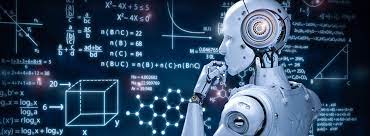

# Aula 5 - Tópicos Avançados de Machine Learning I

Nessa aula, iremos tratar dos seguintes conteúdos:
- Validação de Modelos;
- Pipeline de Modelos.

##   

## Exercicios

**1)** Vamos utilizar o dataset sobre a qualidade do vinho tinto [_'winequality-red.csv'_](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009). Crie um _Pipeline_ onde faça os seguintes passos: _SimpleImputer_, Normalização dos Dados e _RandomForest_. Montado o _Pipeline_, utilize o _Stratified K-Fold_ para separar a base de treino em 5 partes e em seguida faça o _Cross Validation_ utilizando o _cross_val_score_.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wine = pd.read_csv('../datasets/winequality-red.csv')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


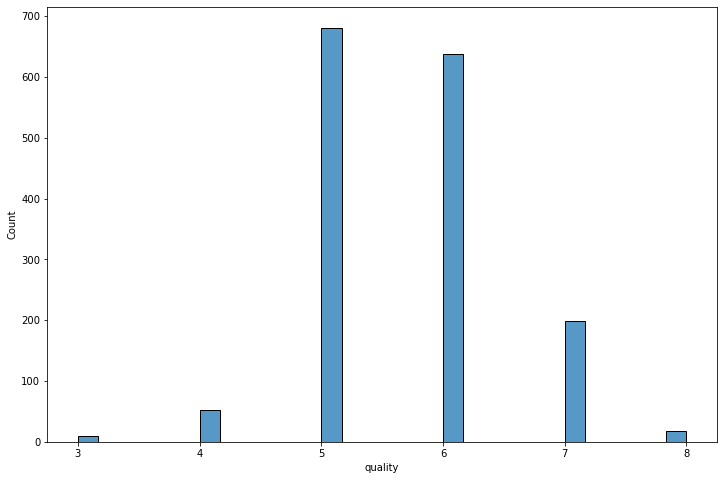

In [8]:
plt.figure(figsize=(12,8))
sns.histplot(wine['quality'])
plt.show()

In [9]:
wine['target'] = np.where(wine['quality'] > 6, 1, 0)

In [10]:
wine['target'].value_counts(normalize = True)

0    0.86429
1    0.13571
Name: target, dtype: float64

In [11]:
X = wine.drop(['quality', 'target'], axis = 1)
y = wine['target']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [13]:
# Split de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

pipeline = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()),
                     ('model', RandomForestClassifier())])

cv = StratifiedKFold(n_splits=5)

scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv = cv)

print("Accuracy para cada um dos Folds: ", scores)
print("Accuracy Médio: ", scores.mean())

Accuracy para cada um dos Folds:  [0.89285714 0.90178571 0.85267857 0.89732143 0.89686099]
Accuracy Médio:  0.8883007687379886


In [14]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       415
           1       0.92      0.52      0.67        65

    accuracy                           0.93       480
   macro avg       0.92      0.76      0.81       480
weighted avg       0.93      0.93      0.92       480



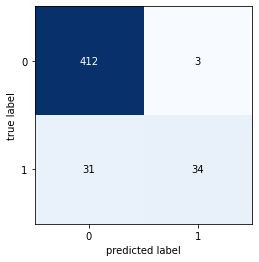

In [16]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

##   

## SHAP

A sigla SHAP (SHapley Additive exPlanations) é o nome para uma importante biblioteca com foco em __Explainable AI__. Esse conceito vem da ideia de focar em __Visualização de Dados__ com __Interpretabilidade de Modelos__, o nosso modelo deixa de ser só uma __black box__ onde preparamos os dados, setamos o modelo e ele nos devolve um resultado, para evoluir ao entendimento desse modelo e como essas features influenciam nas predições. O SAP Values interpreta o impacto de uma determinada feature em comparação a previsão que fariamos em um modelo com ela.

Vamos conhecer algumas das principais visualizações usando o SHAP:

In [17]:
# Provavelmente será preciso instalar o SHAP no notebook
#!pip install shap

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

Vamos retornar no nosso modelo para o dataset '_Admission_Predict_Ver1.1.csv_' e setar ele novamente:

In [19]:
df = pd.read_csv('../datasets/Admission_Predict.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [21]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
df.shape

(400, 9)

In [23]:
df['Chance of Admit '] = np.where(df['Chance of Admit '] > 0.7, 1, 0)

In [24]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)

In [27]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap_obj = explainer(X_train)

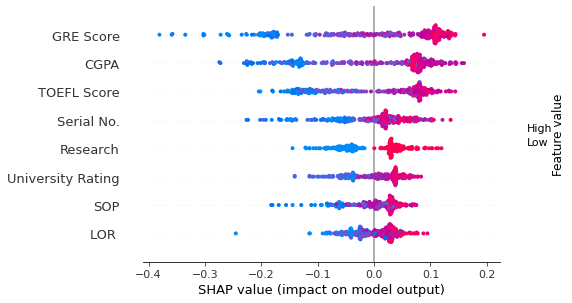

In [29]:
shap.summary_plot(shap_values[1], X_train)

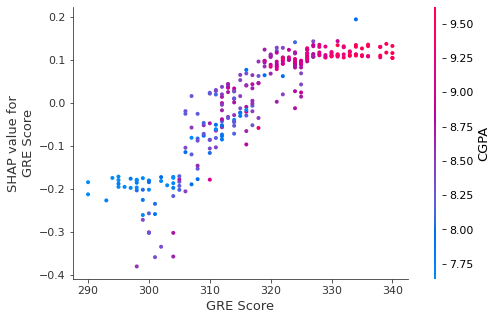

In [30]:
shap.dependence_plot('GRE Score', shap_values[1], X_train, interaction_index="CGPA")

In [31]:
shap.initjs()
shap.plots.force(explainer.expected_value[1], shap_values[1])

Na documentação do [SHAP](https://shap.readthedocs.io/en/latest/), vocês encontram mais detalhes de como funciona a biblioteca e que tipo de visualizações vocês conseguem fazer com ela!